# Aqui está uma lista completa dos atletas mais bem pagos do mundo desde a primeira lista publicada pela Forbes em 1990. Em 2002, eles mudaram o período de relatório do ano civil completo para junho a junho e, consequentemente, não há registros de 2001. Os dados estão disponíveis de 1990 a 2019.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/raw/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df.head(30)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


## Tamanho do conjunto de dados

In [3]:
len(df)

301

In [4]:
df.shape

(301, 8)

## Descrição dos dados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


## Tipos de dados envolvidos

In [6]:
df.dtypes

S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Previous Year Rank       object
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

#### S.NO: uma variável tipo inútil.
#### Name, Nationality, Sport e Previous Year Rank: são variáveis do tipo nominais.
#### Current Rank, Year: é uma variável discreta.
#### earnings ($ million): são variáveis contínuas.

#### Name: é o nome do atleta.
#### Nationality: é a nacionalidade do atleta.
#### Sport: o esporte praticado pelo atleta.
#### Previous Year Rank: Classificação do ano anterior.
#### Current Rank: Os ranks são um grupo de 10 atletas, em um determinado ano, esse grupo são os 10 mais bem pagos.
#### Year: determina o ano do rank e o ano que determinado atleta está na lista dos top 10.
#### earnings ($ million): são os ganhos em milhões do atleta.

## Presença de dados faltantes

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [9]:
df_null = df[df['Previous Year Rank'].isnull()]
df_null

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


### É possivel ver que temos diferenças em sport, alguns começam com letras maiusculas e outros com minusculas, é visivel que alguns sports se repetem, logo temos que cuidar disso para não termos problemas futuros.

In [10]:
df['Sport'] = [sport.capitalize() for sport in df['Sport']]
df.head(30)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,Boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,Boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,Boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,Auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,Auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,Golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,Golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,Basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,Golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,Boxing,1990,8.1


In [11]:
'{:.2f} %'.format(df['Previous Year Rank'].isnull().sum() / len(df) * 100)

'7.97 %'

### 7.97 % é a porcentagem de valores NaN na coluna Previous Year Rank, não é um valor tão alto, então não seria preciso exclui-la, poderia utilizar um metodo de valor mais frequente, uma média talvez. Mas de toda forma, irei excluir a coluna, pois a utilidade dela, não é algo que irei utilizar.

In [12]:
df.drop('Previous Year Rank', axis=1, inplace=True)
df.drop('S.NO',axis=1, inplace=True)

## Distribuição das variáveis

### .Quantidade de vezes que os atletas ficaram no rank 1.
### .Quantidade de vezes que os atletas ficaram no rank 2.
### .Quais locais possuem a maior quantidade de jogadores do rank 1.
### .Quais locais possuem a maior quantidade de jogadores do rank 2.

In [13]:
df_rank_1 = df[df['Current Rank'] == 1].sort_values(by='earnings ($ million)', ascending=False)
df_rank_2 = df[df['Current Rank'] == 2].sort_values(by='earnings ($ million)', ascending=False)

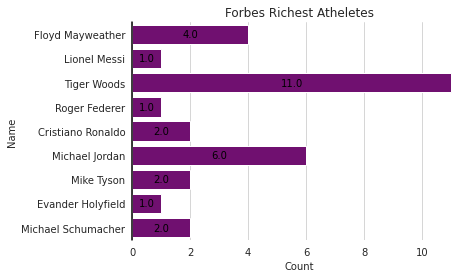

In [14]:
# Quantidade de vezes que os atletas ficaram no rank 1.

sns.set_style('whitegrid')
ax = sns.countplot(data=df_rank_1, y='Name', color='purple');
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='black'
)
plt.xlabel('Count')
plt.ylabel('Name')
plt.title('Forbes Richest Atheletes')
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False);

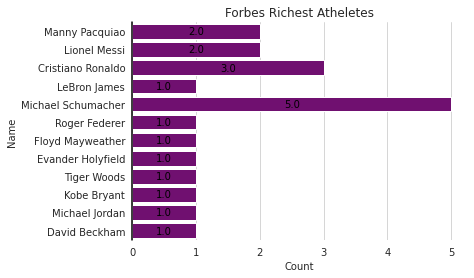

In [15]:
# Quantidade de vezes que os atletas ficaram no rank 2.

sns.set_style('whitegrid')
ax = sns.countplot(data=df_rank_2[:20], y='Name', color='purple');
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='black'
)
plt.xlabel('Count')
plt.ylabel('Name')
plt.title('Forbes Richest Atheletes')
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False);

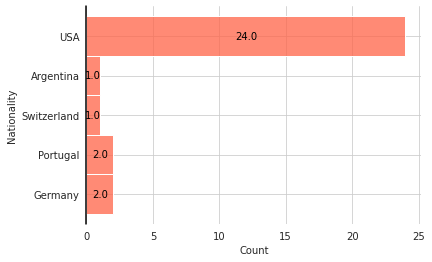

In [16]:
# Quais locais possuem a maior quantidade de jogadores do rank 1.

ax = sns.histplot(data=df_rank_1, y='Nationality', color='tomato');
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='black'
)
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False);

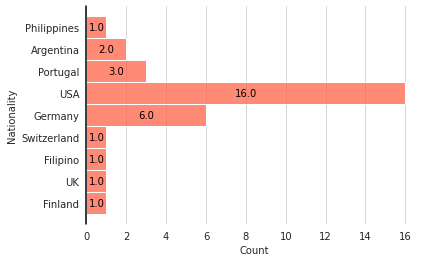

In [17]:
# Quais locais possuem a maior quantidade de jogadores do rank 2.

sns.set_style('whitegrid')
ax = sns.histplot(data=df_rank_2, y='Nationality', color='tomato');
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='black'
)
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False);
ax.grid(axis='y')

### Podemos ver nesses dois ultimos gráficos que USA possui a maior quantidade de atletas do rank 1 e rank 2. Com base nisso, USA, é um dos paises mais conhecidos pelo basketball, seria esse o sport com mais atletas no rank 1?

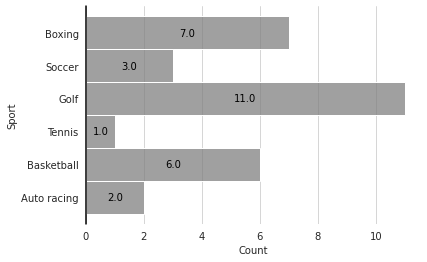

In [18]:
sns.set_style('whitegrid')
ax = sns.histplot(data=df_rank_1, y='Sport', color='grey');
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='black'
)
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False);
ax.grid(axis='y')

### Podemos ver que o golf, é o sport com mais atletas no rank 1, durante o intervalo de anos dos dados, o Boxing em segundo e o basketball ficou em terceiro.

### Quem são os atletas que durante esses anos, ficaram em rank 1 no sport Golf?

In [19]:
df_rank_1[df_rank_1['Sport'] == 'Golf']

,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
171,Tiger Woods,USA,1,Golf,2008,115.0
181,Tiger Woods,USA,1,Golf,2009,110.0
191,Tiger Woods,USA,1,Golf,2010,105.0
161,Tiger Woods,USA,1,Golf,2007,100.0
151,Tiger Woods,USA,1,Golf,2006,90.0
141,Tiger Woods,USA,1,Golf,2005,87.0
131,Tiger Woods,USA,1,Golf,2004,80.3
221,Tiger Woods,USA,1,Golf,2013,78.1
121,Tiger Woods,USA,1,Golf,2003,78.0
201,Tiger Woods,USA,1,Golf,2011,75.0


###  Em varios anos, apenas Tiger Woods ficou no rank 1.

### Quem são os atletas mais bem pagos, entre todos os anos?

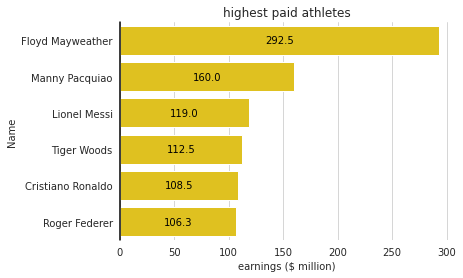

In [20]:
df_earnings = df.sort_values('earnings ($ million)',ascending=False).head(10)
ax = sns.barplot(data=df_earnings, x='earnings ($ million)', y='Name', ci=False, color='gold')
ax.bar_label(
    ax.containers[0],
    fmt='%.1f',
    label_type='center',
    color='black'
)
plt.title('highest paid athletes')
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False);

### Quais nacionalidades tem mais milhões ganhos durante todos esses ano?

In [21]:
nationality_earnings = df.groupby('Nationality')[['earnings ($ million)']].sum().sort_values('earnings ($ million)', ascending=False).reset_index().head(10)
nationality_earnings

,Nationality,earnings ($ million)
0,USA,8786.3
1,Portugal,787.1
2,Switzerland,781.1
3,Argentina,715.5
4,Germany,639.0
5,UK,443.2
6,Brazil,422.0
7,Philippines,242.0
8,Finland,129.0
9,Italy,128.0


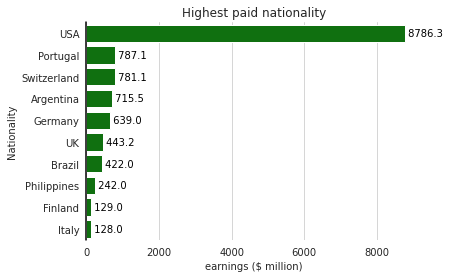

In [22]:
ax = sns.barplot(data=nationality_earnings, x='earnings ($ million)', y='Nationality', color='green')
plt.title('Highest paid nationality')
ax.bar_label(
    ax.containers[0],
    fmt=' %.1f',
    label_type='edge',
    color='black'
)
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False);

### Como ja era de se esperar, pelo número de atletas no rank 1, USA, possui um número significativo de milhões acima do segundo maior Pais.